In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('fivethirtyeight')

In [2]:
state_covid_df = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')
pd.set_option('display.max_rows', 1000)

In [3]:
state_covid_df

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN
...,...,...,...,...,...,...,...
15389,2021-05-14,Tripura,39603,35088,423,23,777407.0
15390,2021-05-14,India,24372243,20426323,266229,10118,311324100.0
15391,2021-05-14,Uttar Pradesh,1596627,1385855,16957,0,44170366.0
15392,2021-05-14,Uttarakhand,277585,188690,4426,5090,4204379.0


In [4]:
state_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15394 non-null  object 
 1   State      15394 non-null  object 
 2   Confirmed  15394 non-null  int64  
 3   Recovered  15394 non-null  int64  
 4   Deceased   15394 non-null  int64  
 5   Other      15394 non-null  int64  
 6   Tested     14631 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 842.0+ KB


In [5]:
state_covid_df.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN


In [6]:
state_covid_df['Date'] = pd.to_datetime(state_covid_df['Date'])

In [7]:
state_covid_df.sort_values(by=['State','Date'], inplace=True)

In [8]:
filt = state_covid_df.State=='Maharashtra'
state_covid_df.loc[filt].tail(200)

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
8093,2020-10-27,Maharashtra,1654028,1478496,43463,525,8700033.0
8129,2020-10-28,Maharashtra,1660766,1486926,43554,540,8768879.0
8165,2020-10-29,Maharashtra,1666668,1494809,43710,546,8837133.0
8201,2020-10-30,Maharashtra,1672858,1503050,43837,553,8906826.0
8237,2020-10-31,Maharashtra,1678406,1510353,43911,557,8967403.0
8273,2020-11-01,Maharashtra,1683775,1514079,44024,563,9024871.0
8309,2020-11-02,Maharashtra,1687784,1524304,44128,575,9065168.0
8345,2020-11-03,Maharashtra,1692693,1531277,44248,625,9120515.0
8381,2020-11-04,Maharashtra,1698198,1540005,44548,733,9185838.0
8417,2020-11-05,Maharashtra,1703444,1551282,44804,839,9250254.0


In [9]:
state_grp = state_covid_df.groupby('State')

In [10]:
state_wise = state_grp.agg({'Confirmed':'max', 'Recovered':'max','Deceased':'max','Tested':'max'}).sort_values(by='Confirmed',ascending=False)

In [11]:
state_wise

,Confirmed,Recovered,Deceased,Tested
State,,,,
India,24372243,20426323,266229,311324100.0
Maharashtra,5309215,4707980,79552,30602140.0
Karnataka,2130267,1510557,21085,27648133.0
Kerala,2085584,1636790,6244,17689727.0
Uttar Pradesh,1596627,1385855,16957,44170366.0
Tamil Nadu,1531377,1318982,17056,24785458.0
Andhra Pradesh,1388803,1175843,9173,17791220.0
Delhi,1380981,1288280,20907,18169856.0
West Bengal,1094802,950017,12993,11309467.0


In [12]:
state_wise.drop('State Unassigned', inplace=True)

In [13]:
fatality_ratio = (state_wise['Deceased']/state_wise['Confirmed'])*100

In [14]:
state_wise['Fatality_ratio'] = fatality_ratio

In [15]:
state_wise

,Confirmed,Recovered,Deceased,Tested,Fatality_ratio
State,,,,,
India,24372243,20426323,266229,311324100.0,1.092345
Maharashtra,5309215,4707980,79552,30602140.0,1.498376
Karnataka,2130267,1510557,21085,27648133.0,0.989782
Kerala,2085584,1636790,6244,17689727.0,0.299389
Uttar Pradesh,1596627,1385855,16957,44170366.0,1.062051
Tamil Nadu,1531377,1318982,17056,24785458.0,1.113769
Andhra Pradesh,1388803,1175843,9173,17791220.0,0.660497
Delhi,1380981,1288280,20907,18169856.0,1.513924
West Bengal,1094802,950017,12993,11309467.0,1.186790


## Death to case ratio

In [16]:
only_state_wise_df = state_wise.drop('India')

Text(0.5, 0.98, 'Top 20 States with highest fatality Ratio')

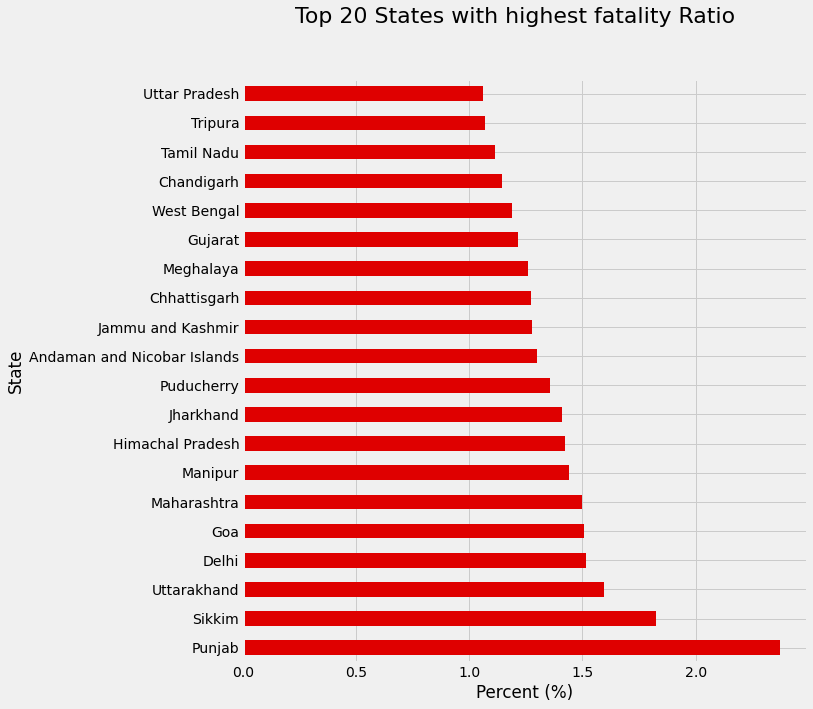

In [17]:
only_state_wise_df.sort_values('Fatality_ratio',
                                     ascending=False)['Fatality_ratio'].head(20).plot.barh(figsize=(9,10), color='#df0000')
plt.xlabel('Percent (%)')
plt.suptitle('Top 20 States with highest fatality Ratio',fontsize=22)
# plt.suptitle('df')

`Percentage of Deceased people is highest in Punjab followed by Sikkim, West Bengal and Maharashtra`

## Recovery rate

In [18]:
states_recovery_per = (only_state_wise_df['Recovered']/only_state_wise_df['Confirmed'])*100

In [19]:
states_recovery_per.sort_values(ascending=False)

State
Andaman and Nicobar Islands                 95.154387
Delhi                                       93.287308
Arunachal Pradesh                           89.337014
Ladakh                                      89.268660
Telangana                                   88.913577
Maharashtra                                 88.675633
Tripura                                     88.599349
Dadra and Nagar Haveli and Daman and Diu    88.425047
Uttar Pradesh                               86.798920
West Bengal                                 86.775234
Tamil Nadu                                  86.130456
Chhattisgarh                                85.840487
Assam                                       85.801395
Bihar                                       85.379164
Andhra Pradesh                              84.665932
Madhya Pradesh                              84.472756
Haryana                                     84.398552
Jharkhand                                   84.058654
Chandigarh            

Text(0.5, 1.0, 'Recovery rate of Each State')

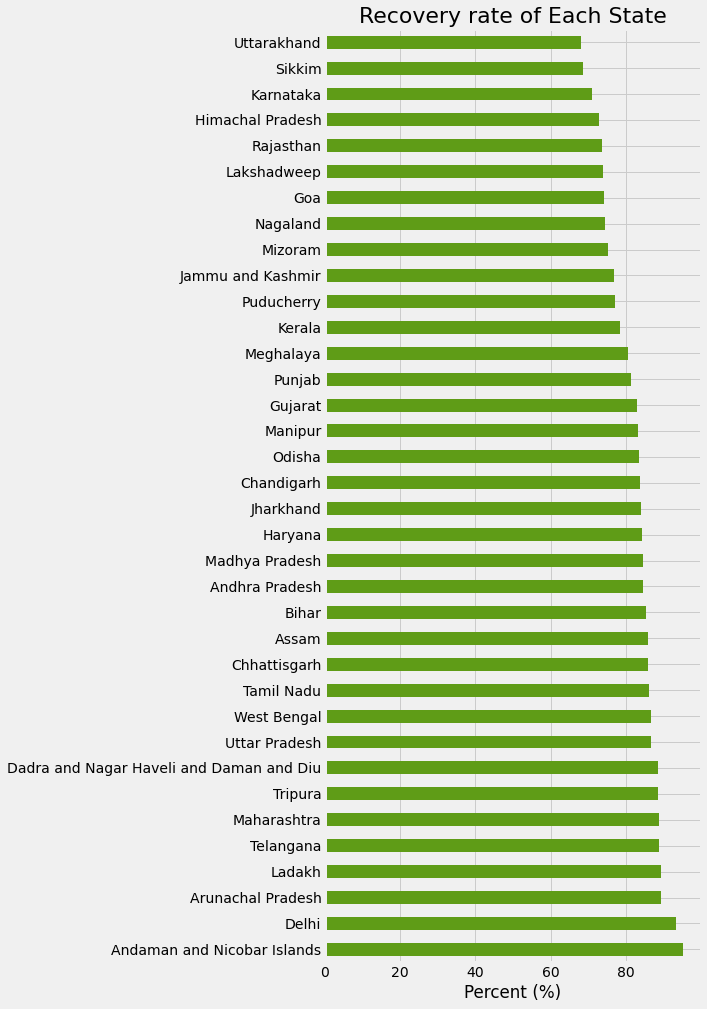

In [20]:
states_recovery_per.sort_values(ascending=False).plot.barh(figsize=(6,16), color='#5f9c17')
plt.xlabel('Percent (%)')
plt.ylabel('')
plt.title('Recovery rate of Each State', fontsize=22)

## Percentage chances of getting COVID

In [21]:
per_chan = (only_state_wise_df['Confirmed']/only_state_wise_df['Tested'])*100

Text(0.5, 0.98, 'Confirmed to Tested Ratio')

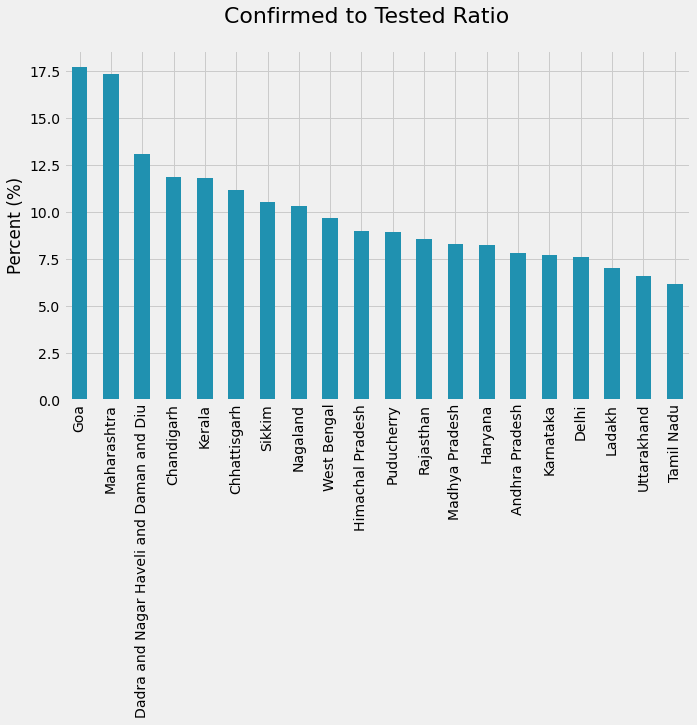

In [22]:
per_chan.sort_values(ascending=False).head(20).plot.bar(figsize=(10,6), color='#2091b0')
plt.ylabel('Percent (%)')
plt.xlabel('')
plt.suptitle('Confirmed to Tested Ratio', fontsize=22)

In [23]:
state_wise.drop('India', inplace=True)

In [24]:
others_ser = state_wise.loc['Uttarakhand':].agg('sum')

In [25]:
state_wise.index

Index(['Maharashtra', 'Karnataka', 'Kerala', 'Uttar Pradesh', 'Tamil Nadu',
       'Andhra Pradesh', 'Delhi', 'West Bengal', 'Chhattisgarh', 'Rajasthan',
       'Gujarat', 'Madhya Pradesh', 'Haryana', 'Bihar', 'Odisha', 'Telangana',
       'Punjab', 'Assam', 'Jharkhand', 'Uttarakhand', 'Jammu and Kashmir',
       'Himachal Pradesh', 'Goa', 'Puducherry', 'Chandigarh', 'Tripura',
       'Manipur', 'Meghalaya', 'Arunachal Pradesh', 'Nagaland', 'Ladakh',
       'Sikkim', 'Dadra and Nagar Haveli and Daman and Diu', 'Mizoram',
       'Andaman and Nicobar Islands', 'Lakshadweep'],
      dtype='object', name='State')

In [26]:
state_wise.drop(index=['Uttarakhand', 'Goa', 'Himachal Pradesh', 'Puducherry', 'Tripura',
       'Manipur', 'Chandigarh', 'Arunachal Pradesh', 'Meghalaya', 'Nagaland',
       'Ladakh', 'Sikkim', 'Andaman and Nicobar Islands', 'Mizoram',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Lakshadweep'], inplace=True)

In [27]:
state_wise.loc['Others'] = others_ser

In [28]:
state_wise

,Confirmed,Recovered,Deceased,Tested,Fatality_ratio
State,,,,,
Maharashtra,5309215.0,4707980.0,79552.0,30602140.0,1.498376
Karnataka,2130267.0,1510557.0,21085.0,27648133.0,0.989782
Kerala,2085584.0,1636790.0,6244.0,17689727.0,0.299389
Uttar Pradesh,1596627.0,1385855.0,16957.0,44170366.0,1.062051
Tamil Nadu,1531377.0,1318982.0,17056.0,24785458.0,1.113769
Andhra Pradesh,1388803.0,1175843.0,9173.0,17791220.0,0.660497
Delhi,1380981.0,1288280.0,20907.0,18169856.0,1.513924
West Bengal,1094802.0,950017.0,12993.0,11309467.0,1.186790
Chhattisgarh,899925.0,772500.0,11461.0,8049298.0,1.273551


In [29]:
state_wise_cases = state_wise['Confirmed']
state_wise_rec = state_wise['Recovered']
state_wise_deaths = state_wise['Deceased']

Text(0.5, 1.0, 'Percent share of Confirmed Cases by State')

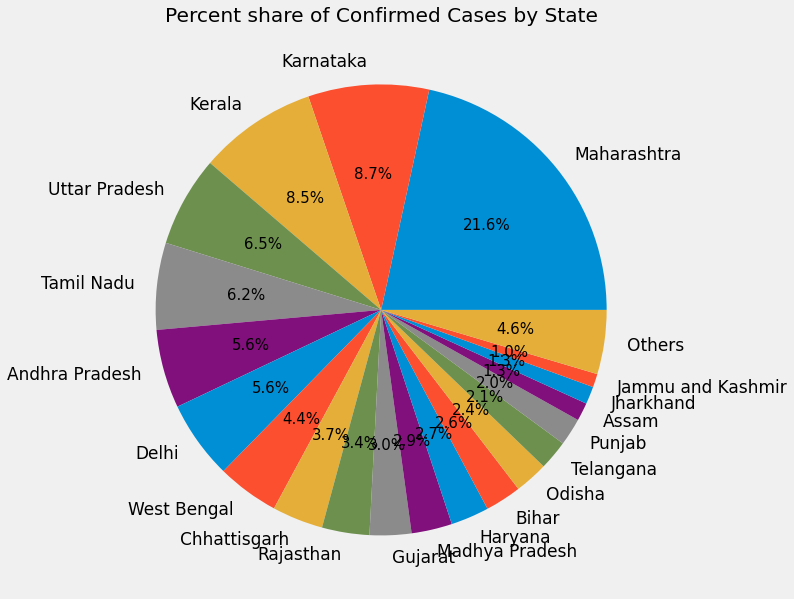

In [30]:
fig, ax = plt.subplots()
fig.set_figheight(27)
fig.set_figwidth(9)
patches, texts, autotexts = ax.pie(state_wise_cases.values, labels=state_wise_cases.index, autopct='%1.1f%%')

for i in range(len(texts)):
    texts[i].set_fontsize(17)
    autotexts[i].set_fontsize(15)

plt.title('Percent share of Confirmed Cases by State')

`Above graph shows what percentage of Confirmed COVID cases are comming from each State out of the total cases in India`

In [31]:
maharashtra = state_grp.get_group('Maharashtra')[['Date','Confirmed','Recovered','Deceased']]
karnataka = state_grp.get_group('Karnataka')[['Date','Confirmed','Recovered','Deceased']]
andhra = state_grp.get_group('Andhra Pradesh')[['Date','Confirmed','Recovered','Deceased']]
tamil_nadu = state_grp.get_group('Tamil Nadu')[['Date','Confirmed','Recovered','Deceased']]
kerala = state_grp.get_group('Kerala')[['Date','Confirmed','Recovered','Deceased']]
delhi = state_grp.get_group('Delhi')[['Date','Confirmed','Recovered','Deceased']]
up = state_grp.get_group('Uttar Pradesh')[['Date','Confirmed','Recovered','Deceased']]
west_ben = state_grp.get_group('West Bengal')[['Date','Confirmed','Recovered','Deceased']]

In [32]:
maharashtra

,Date,Confirmed,Recovered,Deceased
62,2020-03-09,2,0,0
75,2020-03-10,5,0,0
88,2020-03-11,11,0,0
102,2020-03-12,14,0,0
116,2020-03-13,17,0,0
131,2020-03-14,26,0,0
146,2020-03-15,32,0,0
162,2020-03-16,39,0,0
179,2020-03-17,41,0,0
198,2020-03-18,45,0,0


Text(0.5, 0.98, 'Top 8 States with Higest cases over Time')

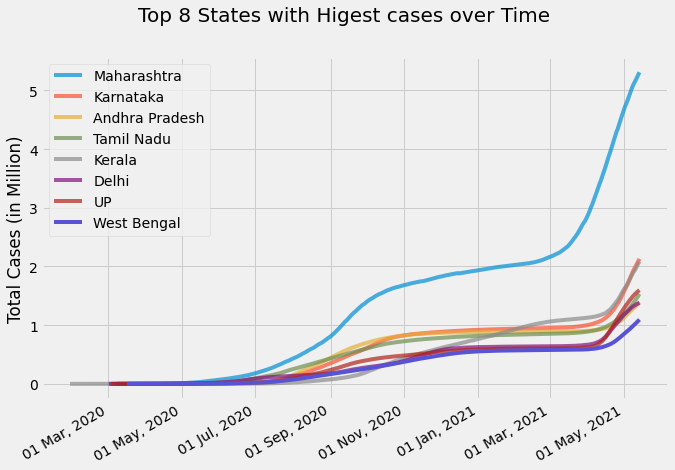

In [33]:
plt.figure(figsize=(10,7))
dates = maharashtra['Date']
plt.plot(dates, maharashtra['Confirmed']/10**6,label='Maharashtra',alpha=.7)
dates = karnataka['Date']
plt.plot(dates, karnataka['Confirmed']/10**6,label='Karnataka',alpha=.7)
dates = andhra['Date']
plt.plot(dates, andhra['Confirmed']/10**6,label='Andhra Pradesh',alpha=.7)
dates = tamil_nadu['Date']
plt.plot(dates, tamil_nadu['Confirmed']/10**6,label='Tamil Nadu',alpha=.7)
dates = kerala['Date']
plt.plot(dates, kerala['Confirmed']/10**6,label='Kerala',alpha=.7)
dates = delhi['Date']
plt.plot(dates, delhi['Confirmed']/10**6,label='Delhi',alpha=.7)
dates = up['Date']
plt.plot(dates, up['Confirmed']/10**6,label='UP',color='#b02319',alpha=.7)
dates = west_ben['Date']
plt.plot(dates, west_ben['Confirmed']/10**6,label='West Bengal',color='#5753d4')

plt.legend()

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Total Cases (in Million)')
plt.suptitle('Top 8 States with Higest cases over Time', fontsize=20)

Text(0.5, 0.98, 'Top 8 States Recovery over Time')

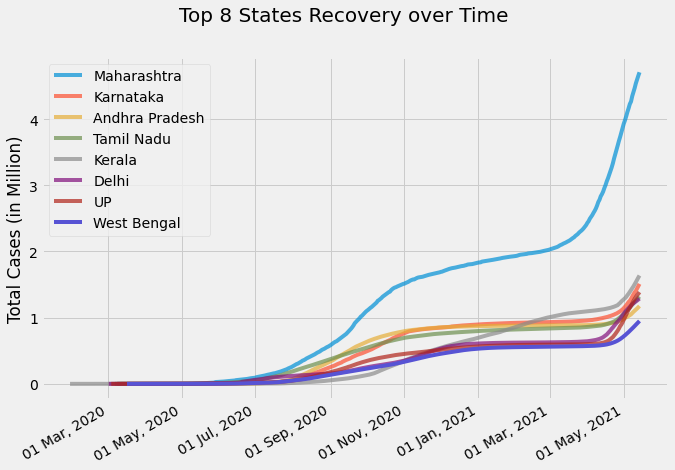

In [34]:
plt.figure(figsize=(10,7))
dates = maharashtra['Date']
plt.plot(dates, maharashtra['Recovered']/10**6,label='Maharashtra',alpha=.7)
dates = karnataka['Date']
plt.plot(dates, karnataka['Recovered']/10**6,label='Karnataka',alpha=.7)
dates = andhra['Date']
plt.plot(dates, andhra['Recovered']/10**6,label='Andhra Pradesh',alpha=.7)
dates = tamil_nadu['Date']
plt.plot(dates, tamil_nadu['Recovered']/10**6,label='Tamil Nadu',alpha=.7)
dates = kerala['Date']
plt.plot(dates, kerala['Recovered']/10**6,label='Kerala',alpha=.7)
dates = delhi['Date']
plt.plot(dates, delhi['Recovered']/10**6,label='Delhi',alpha=.7)
dates = up['Date']
plt.plot(dates, up['Recovered']/10**6,label='UP',color='#b02319',alpha=.7)
dates = west_ben['Date']
plt.plot(dates, west_ben['Recovered']/10**6,label='West Bengal',color='#5753d4')

plt.legend()

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Total Cases (in Million)')
plt.suptitle('Top 8 States Recovery over Time', fontsize=20)

Text(0.5, 0.98, 'Total Deaths in Top 8 States over Time')

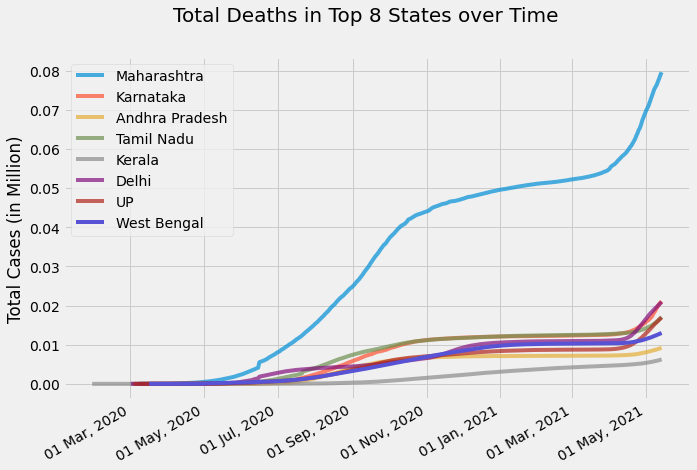

In [35]:
plt.figure(figsize=(10,7))
dates = maharashtra['Date']
plt.plot(dates, maharashtra['Deceased']/10**6,label='Maharashtra',alpha=.7)
dates = karnataka['Date']
plt.plot(dates, karnataka['Deceased']/10**6,label='Karnataka',alpha=.7)
dates = andhra['Date']
plt.plot(dates, andhra['Deceased']/10**6,label='Andhra Pradesh',alpha=.7)
dates = tamil_nadu['Date']
plt.plot(dates, tamil_nadu['Deceased']/10**6,label='Tamil Nadu',alpha=.7)
dates = kerala['Date']
plt.plot(dates, kerala['Deceased']/10**6,label='Kerala',alpha=.7)
dates = delhi['Date']
plt.plot(dates, delhi['Deceased']/10**6,label='Delhi',alpha=.7)
dates = up['Date']
plt.plot(dates, up['Deceased']/10**6,label='UP',color='#b02319',alpha=.7)
dates = west_ben['Date']
plt.plot(dates, west_ben['Deceased']/10**6,label='West Bengal',color='#5753d4')

plt.legend()

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Total Cases (in Million)')
plt.suptitle('Total Deaths in Top 8 States over Time', fontsize=20)

Text(0.5, 0, 'Count (in Million)')

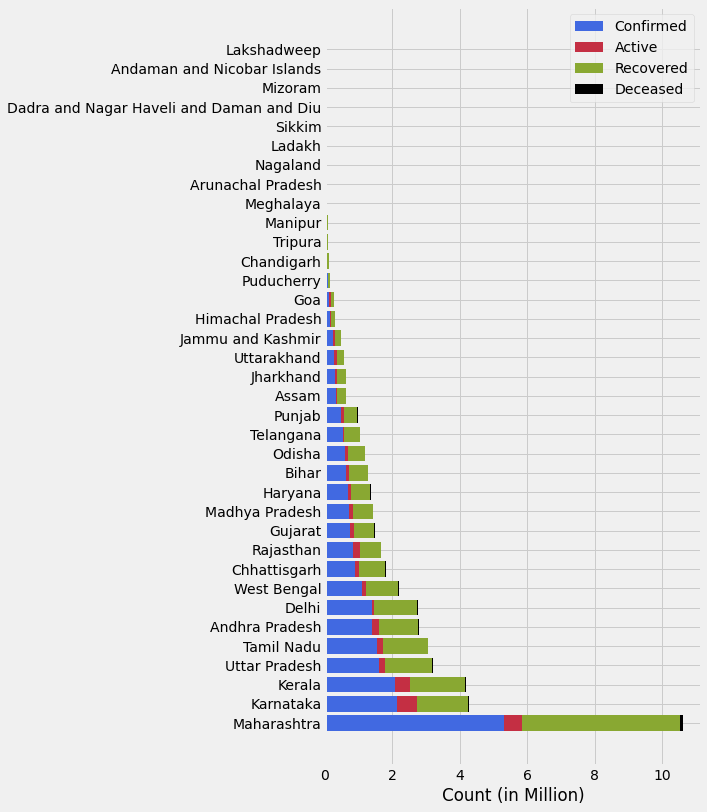

In [36]:
death = only_state_wise_df.Deceased
recov = only_state_wise_df.Recovered
conf = only_state_wise_df.Confirmed
active = conf - death - recov

plt.figure(figsize=(6,13))

data_lst = [conf/10**6, active/10**6, recov/10**6, death/10**6]
label_lst = ['Confirmed','Active','Recovered','Deceased']
color_lst = ['royalblue','#c42f43','#89a832','black']
left=0

for data, color, label in zip(data_lst, color_lst, label_lst):
    plt.barh(data.index, data, color=color, left=left, label=label)
    left+=data

plt.legend()
plt.xlabel('Count (in Million)')

## Confirmed = Active + Recovered + Deceased

In [37]:
state_daily_df = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')

In [38]:
state_daily_df.head()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,2020-03-14,Recovered,9,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,2020-03-14,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,2020-03-15,Recovered,4,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


In [39]:
state_daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1281 non-null   object
 1   Date_YMD  1281 non-null   object
 2   Status    1281 non-null   object
 3   TT        1281 non-null   int64 
 4   AN        1281 non-null   int64 
 5   AP        1281 non-null   int64 
 6   AR        1281 non-null   int64 
 7   AS        1281 non-null   int64 
 8   BR        1281 non-null   int64 
 9   CH        1281 non-null   int64 
 10  CT        1281 non-null   int64 
 11  DN        1281 non-null   int64 
 12  DD        1281 non-null   int64 
 13  DL        1281 non-null   int64 
 14  GA        1281 non-null   int64 
 15  GJ        1281 non-null   int64 
 16  HR        1281 non-null   int64 
 17  HP        1281 non-null   int64 
 18  JK        1281 non-null   int64 
 19  JH        1281 non-null   int64 
 20  KA        1281 non-null   int64 
 21  KL        1281

In [40]:
state_daily_df['Date_YMD'] = pd.to_datetime(state_daily_df['Date_YMD'], format='%Y-%m-%d')

In [41]:
state_daily_df.sort_values(by=['Status','Date_YMD'], inplace=True)

In [42]:
state_daily_df

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
6,16-Mar-20,2020-03-16,Confirmed,15,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,17-Mar-20,2020-03-17,Confirmed,11,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0
12,18-Mar-20,2020-03-18,Confirmed,37,0,0,0,0,0,0,...,1,3,0,1,8,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,10-May-21,2021-05-10,Recovered,355930,37,16167,179,4231,15800,714,...,6894,13499,139,20904,7754,130,29709,4887,18675,0
1270,11-May-21,2021-05-11,Recovered,355398,24,14502,232,4409,13852,805,...,7324,13198,34,19182,7430,150,29358,4933,18994,0
1273,12-May-21,2021-05-12,Recovered,352005,26,19095,108,3880,12265,859,...,4971,12840,93,19508,5695,137,27139,7005,19231,0
1276,13-May-21,2021-05-13,Recovered,344676,38,18638,180,4219,11008,837,...,8237,12929,142,19287,6876,127,19425,5748,19181,0


In [43]:
state_daily_df.set_index('Date_YMD', inplace=True)

In [44]:
filt = state_daily_df.Status=='Confirmed'
maha_daily_conf = state_daily_df.loc[filt, 'MH']
filt = state_daily_df.Status=='Recovered'
maha_daily_rec = state_daily_df.loc[filt, 'MH']
filt = state_daily_df.Status=='Deceased'
maha_daily_death = state_daily_df.loc[filt, 'MH']

In [45]:
curr_date = state_daily_df.index.max()

todays_cases = maha_daily_conf.get(curr_date)
todays_rec = maha_daily_rec.get(curr_date)
todays_death = maha_daily_death.get(curr_date)

Text(-35, 10, '695')

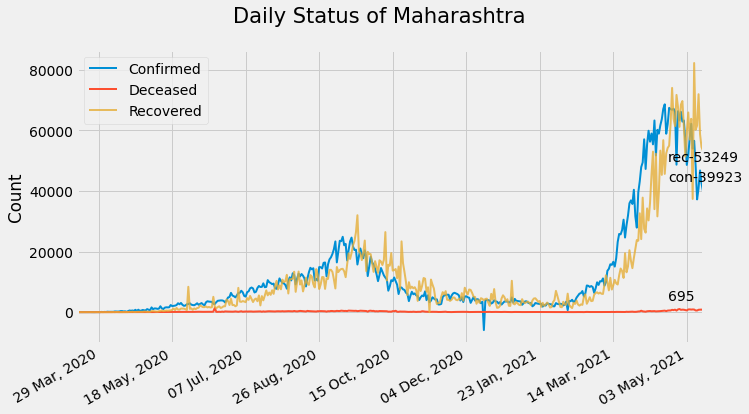

In [46]:
plt.figure(figsize=(10,6))

maha_daily_conf.plot(linewidth=2, label='Confirmed')
maha_daily_death.plot(linewidth=2, label='Deceased')
maha_daily_rec.plot(linewidth=2, label='Recovered', alpha=.8)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))


plt.ylabel('Count')
plt.xlabel('')
plt.suptitle('Daily Status of Maharashtra', fontsize=21)
plt.legend()

plt.annotate(text='con-'+str(todays_cases), xy=(curr_date, todays_cases),
             xycoords='data', xytext=(-35,10), textcoords='offset points', fontsize=14)
plt.annotate(text='rec-'+str(todays_rec), xy=(curr_date, todays_rec),
             xycoords='data', xytext=(-35,-10), textcoords='offset points', fontsize=14)
plt.annotate(text=str(todays_death), xy=(curr_date, todays_death),
             xycoords='data', xytext=(-35,10), textcoords='offset points', fontsize=14)

# Vaccination

In [47]:
vac_df = pd.read_csv('http://api.covid19india.org/csv/latest/cowin_vaccine_data_statewise.csv')
pd.set_option('display.max_rows', 1000)

In [48]:
vac_df

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4398,10/05/2021,West Bengal,8844778.0,342346.0,2009.0,8844778.0,3263883.0,4752862.0,4090901.0,1015.0,1293385.0,10815276.0,1032.0,281102.0,810713.0,3982739.0,3769369.0,12108661
4399,11/05/2021,West Bengal,8862487.0,273890.0,1560.0,8862487.0,3364391.0,4763561.0,4097909.0,1017.0,1325190.0,10901688.0,1033.0,282991.0,814971.0,3989225.0,3774405.0,12226878
4400,12/05/2021,West Bengal,8890679.0,290220.0,1693.0,8890679.0,3517391.0,4779701.0,4109958.0,1020.0,1350173.0,11057897.0,1033.0,285689.0,820096.0,4000085.0,3783870.0,12408070
4401,13/05/2021,West Bengal,8916777.0,252139.0,1473.0,8916777.0,3645913.0,4795315.0,4120439.0,1023.0,1372847.0,11189843.0,1034.0,288514.0,826151.0,4009986.0,3791146.0,12562690


In [49]:
filt = vac_df.State=='India'
index_names = vac_df.loc[filt].index
state_vac_df = vac_df.drop(index_names).copy()

In [50]:
state_vac_df

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
119,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23
120,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23
121,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42
122,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89
123,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4398,10/05/2021,West Bengal,8844778.0,342346.0,2009.0,8844778.0,3263883.0,4752862.0,4090901.0,1015.0,1293385.0,10815276.0,1032.0,281102.0,810713.0,3982739.0,3769369.0,12108661
4399,11/05/2021,West Bengal,8862487.0,273890.0,1560.0,8862487.0,3364391.0,4763561.0,4097909.0,1017.0,1325190.0,10901688.0,1033.0,282991.0,814971.0,3989225.0,3774405.0,12226878
4400,12/05/2021,West Bengal,8890679.0,290220.0,1693.0,8890679.0,3517391.0,4779701.0,4109958.0,1020.0,1350173.0,11057897.0,1033.0,285689.0,820096.0,4000085.0,3783870.0,12408070
4401,13/05/2021,West Bengal,8916777.0,252139.0,1473.0,8916777.0,3645913.0,4795315.0,4120439.0,1023.0,1372847.0,11189843.0,1034.0,288514.0,826151.0,4009986.0,3791146.0,12562690


In [51]:
state_vac_df.drop(['Total Sessions Conducted','Total Sites ','Male(Individuals Vaccinated)','Female(Individuals Vaccinated)','Transgender(Individuals Vaccinated)'], axis=1, inplace=True)

In [52]:
state_vac_df.head(200)

,Updated On,State,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,AEFI,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
119,16/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23
120,17/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23
121,18/01/2021,Andaman and Nicobar Islands,42.0,42.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42
122,19/01/2021,Andaman and Nicobar Islands,89.0,89.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89
123,20/01/2021,Andaman and Nicobar Islands,124.0,124.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124
124,21/01/2021,Andaman and Nicobar Islands,239.0,239.0,0.0,0.0,239.0,NaN,NaN,NaN,NaN,NaN,239
125,22/01/2021,Andaman and Nicobar Islands,552.0,552.0,0.0,0.0,552.0,NaN,NaN,NaN,NaN,NaN,552
126,23/01/2021,Andaman and Nicobar Islands,920.0,920.0,0.0,0.0,920.0,NaN,NaN,NaN,NaN,NaN,920
127,24/01/2021,Andaman and Nicobar Islands,966.0,966.0,0.0,0.0,966.0,NaN,NaN,NaN,NaN,NaN,966
128,25/01/2021,Andaman and Nicobar Islands,1519.0,1519.0,0.0,0.0,1519.0,NaN,NaN,NaN,NaN,NaN,1519


In [53]:
state_vac_df.rename(columns={'Updated On':'Date'}, inplace=True)

In [54]:
state_vac_df['Date'] = pd.to_datetime(state_vac_df['Date'], format='%d/%m/%Y')
state_vac_df.sort_values(by=['State', 'Date'])

,Date,State,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,AEFI,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
119,2021-01-16,Andaman and Nicobar Islands,23.0,23.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23
120,2021-01-17,Andaman and Nicobar Islands,23.0,23.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23
121,2021-01-18,Andaman and Nicobar Islands,42.0,42.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42
122,2021-01-19,Andaman and Nicobar Islands,89.0,89.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89
123,2021-01-20,Andaman and Nicobar Islands,124.0,124.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4398,2021-05-10,West Bengal,8844778.0,8844778.0,3263883.0,1293385.0,10815276.0,1032.0,281102.0,810713.0,3982739.0,3769369.0,12108661
4399,2021-05-11,West Bengal,8862487.0,8862487.0,3364391.0,1325190.0,10901688.0,1033.0,282991.0,814971.0,3989225.0,3774405.0,12226878
4400,2021-05-12,West Bengal,8890679.0,8890679.0,3517391.0,1350173.0,11057897.0,1033.0,285689.0,820096.0,4000085.0,3783870.0,12408070
4401,2021-05-13,West Bengal,8916777.0,8916777.0,3645913.0,1372847.0,11189843.0,1034.0,288514.0,826151.0,4009986.0,3791146.0,12562690


In [55]:
state_vac_grp = state_vac_df.groupby('State')

In [56]:
state_wise_vac = state_vac_grp.agg({'First Dose Administered':'max', 'Second Dose Administered':'max',
                  'Second Dose Administered':'max', 'Total Covaxin Administered':'max',
                  'Total CoviShield Administered':'max','Total Individuals Vaccinated':'max',
                  'Total Doses Administered':'max'})

In [57]:
states = (state_wise_vac['Total Individuals Vaccinated']/10**6).sort_values(ascending=False)

Text(0.5, 1.0, 'Vaccination of all States')

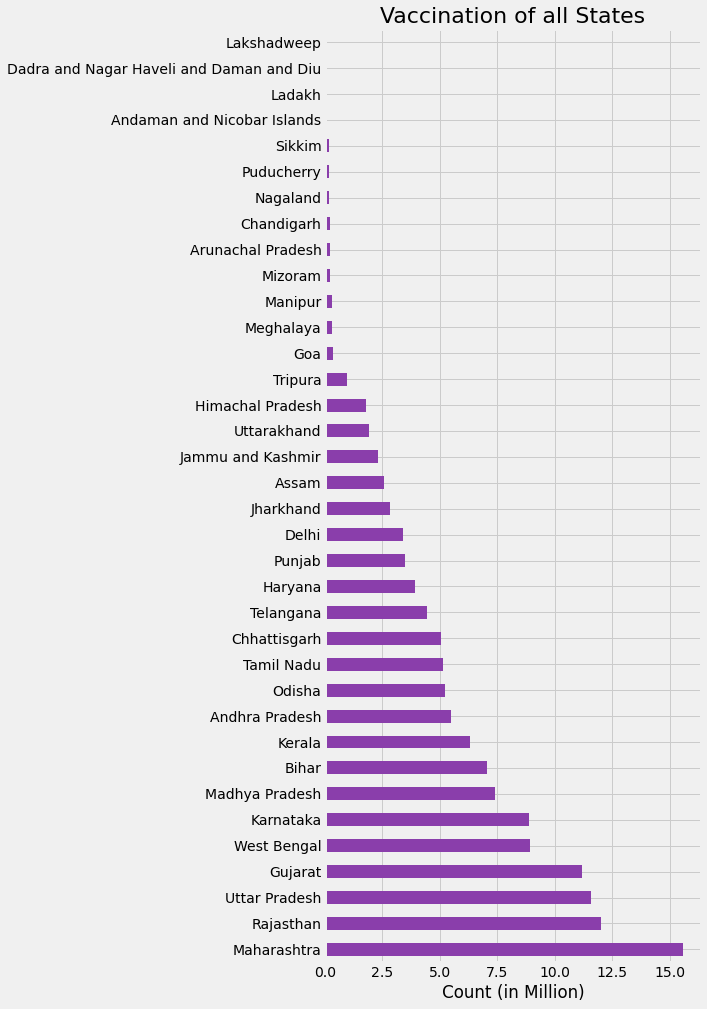

In [58]:
plt.figure(figsize=(6,16))
states.plot.barh(color='#8a3eab')
plt.xlabel('Count (in Million)')
plt.ylabel('')
plt.title('Vaccination of all States', fontsize=22)

In [59]:
state_vac_df.head(300)

,Date,State,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,AEFI,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
119,2021-01-16,Andaman and Nicobar Islands,23.0,23.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23
120,2021-01-17,Andaman and Nicobar Islands,23.0,23.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23
121,2021-01-18,Andaman and Nicobar Islands,42.0,42.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42
122,2021-01-19,Andaman and Nicobar Islands,89.0,89.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89
123,2021-01-20,Andaman and Nicobar Islands,124.0,124.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124
124,2021-01-21,Andaman and Nicobar Islands,239.0,239.0,0.0,0.0,239.0,NaN,NaN,NaN,NaN,NaN,239
125,2021-01-22,Andaman and Nicobar Islands,552.0,552.0,0.0,0.0,552.0,NaN,NaN,NaN,NaN,NaN,552
126,2021-01-23,Andaman and Nicobar Islands,920.0,920.0,0.0,0.0,920.0,NaN,NaN,NaN,NaN,NaN,920
127,2021-01-24,Andaman and Nicobar Islands,966.0,966.0,0.0,0.0,966.0,NaN,NaN,NaN,NaN,NaN,966
128,2021-01-25,Andaman and Nicobar Islands,1519.0,1519.0,0.0,0.0,1519.0,NaN,NaN,NaN,NaN,NaN,1519


In [60]:
state_vac_df.dropna(thresh=5, inplace=True)

In [61]:
state_vac_df.set_index(['State', 'Date'], inplace=True)

In [62]:
mah_total_vac = state_vac_df.loc['Maharashtra']['Total Individuals Vaccinated']
up_total_vac = state_vac_df.loc['Uttar Pradesh']['Total Individuals Vaccinated']
guj_total_vac = state_vac_df.loc['Gujarat']['Total Individuals Vaccinated']
raj_total_vac = state_vac_df.loc['Rajasthan']['Total Individuals Vaccinated']
wb_total_vac = state_vac_df.loc['West Bengal']['Total Individuals Vaccinated']
kar_total_vac = state_vac_df.loc['Karnataka']['Total Individuals Vaccinated']


Text(0.5, 0.98, 'Total Individuals Vaccinated Over Time')

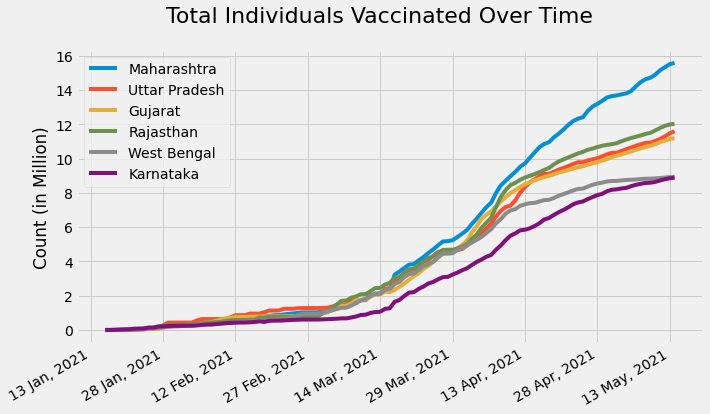

In [63]:
plt.figure(figsize=(10,6))
plt.plot(mah_total_vac/10**6, label='Maharashtra')
plt.plot(up_total_vac/10**6, label='Uttar Pradesh')
plt.plot(guj_total_vac/10**6, label='Gujarat')
plt.plot(raj_total_vac/10**6, label='Rajasthan')
plt.plot(wb_total_vac/10**6, label='West Bengal')
plt.plot(kar_total_vac/10**6, label='Karnataka')

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

plt.legend()
plt.xlabel('')
plt.ylabel('Count (in Million)')
plt.suptitle('Total Individuals Vaccinated Over Time', fontsize=22)

## How many Individuals are immunized daily?

In [64]:
state_vac_df

Total Individuals Vaccinated  \
State                       Date                                       
Andaman and Nicobar Islands 2021-01-16                          23.0   
                            2021-01-17                          23.0   
                            2021-01-18                          42.0   
                            2021-01-19                          89.0   
                            2021-01-20                         124.0   
...                                                              ...   
West Bengal                 2021-05-10                     8844778.0   
                            2021-05-11                     8862487.0   
                            2021-05-12                     8890679.0   
                            2021-05-13                     8916777.0   
                            2021-05-14                     8929070.0   

                                        First Dose Administered  \
State                       Date                                  
Andaman and Nicobar Islands 2021-01-16                     23.0   
                            2021-01-17                     23.0   
                            2021-01-18                     42.0   
                            2021-01-19                     89.0   
                            2021-01-20                    124.0   
...                                                         ...   
West Bengal                 2021-05-10                8844778.0   
                            2021-05-11                8862487.0   
                            2021-05-12                8890679.0   
                            2021-05-13                8916777.0   
                            2021-05-14                8929070.0   

                                        Second Dose Administered  \
State                       Date                                   
Andaman and Nicobar Islands 2021-01-16                       0.0   
                            2021-01-17                       0.0   
                            2021-01-18                       0.0   
                            2021-01-19                       0.0   
                            2021-01-20                       0.0   
...                                                          ...   
West Bengal                 2021-05-10                 3263883.0   
                            2021-05-11                 3364391.0   
                            2021-05-12                 3517391.0   
                            2021-05-13                 3645913.0   
                            2021-05-14                 3680177.0   

                                        Total Covaxin Administered  \
State                       Date                                     
Andaman and Nicobar Islands 2021-01-16                         0.0   
                            2021-01-17                         0.0   
                            2021-01-18                         0.0   
                            2021-01-19                         0.0   
                            2021-01-20                         0.0   
...                                                            ...   
West Bengal                 2021-05-10                   1293385.0   
                            2021-05-11                   1325190.0   
                            2021-05-12                   1350173.0   
                            2021-05-13                   1372847.0   
                            2021-05-14                   1381997.0   

                                        Total CoviShield Administered    AEFI  \
State                       Date                                                
Andaman and Nicobar Islands 2021-01-16                           23.0     NaN   
                            2021-01-17                           23.0     NaN   
                            2021-01-18                           42.0     NaN   
                            20

In [65]:
state_vac_df['Daily Individuals Vaccinated']=""

In [66]:
prev_state=state_vac_df.index[0][0]
prev_vac=0
curr_vac=0
count = 0

for state, date in state_vac_df.index:
    curr_state = state
    
    if(curr_state!=prev_state): 
        prev_vac=0
        
    curr_vac = state_vac_df.loc[(state,date),'Total Individuals Vaccinated']
    if(curr_vac-prev_vac < 0 ): 
        count+=1;
        state_vac_df.loc[(state,date), 'Daily Individuals Vaccinated'] = 0
    else: state_vac_df.loc[(state,date), 'Daily Individuals Vaccinated'] = curr_vac-prev_vac
    prev_vac=curr_vac
    prev_state = curr_state

In [67]:
state_vac_df

Total Individuals Vaccinated  \
State                       Date                                       
Andaman and Nicobar Islands 2021-01-16                          23.0   
                            2021-01-17                          23.0   
                            2021-01-18                          42.0   
                            2021-01-19                          89.0   
                            2021-01-20                         124.0   
...                                                              ...   
West Bengal                 2021-05-10                     8844778.0   
                            2021-05-11                     8862487.0   
                            2021-05-12                     8890679.0   
                            2021-05-13                     8916777.0   
                            2021-05-14                     8929070.0   

                                        First Dose Administered  \
State                       Date                                  
Andaman and Nicobar Islands 2021-01-16                     23.0   
                            2021-01-17                     23.0   
                            2021-01-18                     42.0   
                            2021-01-19                     89.0   
                            2021-01-20                    124.0   
...                                                         ...   
West Bengal                 2021-05-10                8844778.0   
                            2021-05-11                8862487.0   
                            2021-05-12                8890679.0   
                            2021-05-13                8916777.0   
                            2021-05-14                8929070.0   

                                        Second Dose Administered  \
State                       Date                                   
Andaman and Nicobar Islands 2021-01-16                       0.0   
                            2021-01-17                       0.0   
                            2021-01-18                       0.0   
                            2021-01-19                       0.0   
                            2021-01-20                       0.0   
...                                                          ...   
West Bengal                 2021-05-10                 3263883.0   
                            2021-05-11                 3364391.0   
                            2021-05-12                 3517391.0   
                            2021-05-13                 3645913.0   
                            2021-05-14                 3680177.0   

                                        Total Covaxin Administered  \
State                       Date                                     
Andaman and Nicobar Islands 2021-01-16                         0.0   
                            2021-01-17                         0.0   
                            2021-01-18                         0.0   
                            2021-01-19                         0.0   
                            2021-01-20                         0.0   
...                                                            ...   
West Bengal                 2021-05-10                   1293385.0   
                            2021-05-11                   1325190.0   
                            2021-05-12                   1350173.0   
                            2021-05-13                   1372847.0   
                            2021-05-14                   1381997.0   

                                        Total CoviShield Administered    AEFI  \
State                       Date                                                
Andaman and Nicobar Islands 2021-01-16                           23.0     NaN   
                            2021-01-17                           23.0     NaN   
                            2021-01-18                           42.0     NaN   
                            20

In [68]:
mah_daily_vac = state_vac_df.loc['Maharashtra']['Daily Individuals Vaccinated']
up_daily_vac = state_vac_df.loc['Uttar Pradesh']['Daily Individuals Vaccinated']
raj_daily_vac = state_vac_df.loc['Rajasthan']['Daily Individuals Vaccinated']
guj_daily_vac = state_vac_df.loc['Gujarat']['Daily Individuals Vaccinated']
wb_daily_vac = state_vac_df.loc['West Bengal']['Daily Individuals Vaccinated']
kar_daily_vac = state_vac_df.loc['Karnataka']['Daily Individuals Vaccinated']

In [69]:
curr_mah_vac = mah_daily_vac.loc[curr_date]

In [70]:
curr_mah_vac

72633.0

Text(-5, 10, '72633')

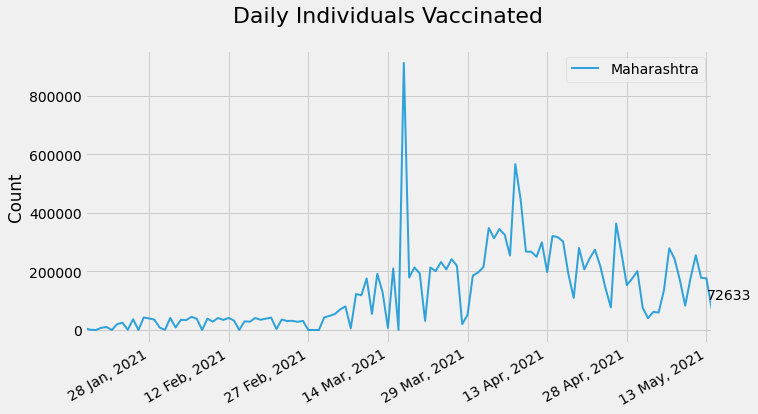

In [71]:
plt.figure(figsize=(10,6))
mah_daily_vac.plot(label='Maharashtra',linewidth=2, alpha=.8)
# up_daily_vac.plot(label='Uttar Pradesh', linewidth=2, alpha=.8)
# raj_daily_vac.plot(label='Rajasthan', linewidth=2, alpha=.8)
# guj_daily_vac.plot(label='Gujarat', linewidth=2, alpha=.7)
# wb_daily_vac.plot(label='West Bengal', linewidth=2, alpha=.7)
# kar_daily_vac.plot(label='Karnataka', linewidth=2, alpha=.6)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

plt.legend()
plt.xlabel('')
plt.ylabel('Count')
plt.suptitle('Daily Individuals Vaccinated', fontsize=22)
plt.annotate(text=str(int(curr_mah_vac)), xy=(curr_date, curr_mah_vac),
             xycoords='data', xytext=(-5,10), textcoords='offset points', fontsize=14)

## Summary

In [72]:
states_conf = only_state_wise_df['Confirmed']/10**6
states_active = only_state_wise_df['Confirmed']-only_state_wise_df['Recovered']-only_state_wise_df['Deceased']
states_fat_ratio = only_state_wise_df['Fatality_ratio']*1000

Text(0, 0.5, 'Active')

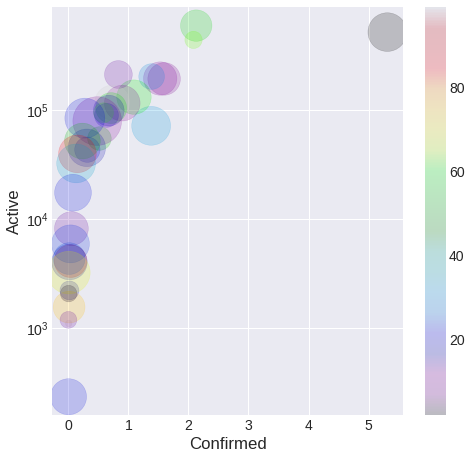

In [73]:
plt.style.use("seaborn-dark")

plt.figure(figsize=(7,7))
colors = np.random.randint(100, size=(len(states_conf)))

plt.scatter(states_conf, states_active, c=colors, alpha=.2, s=states_fat_ratio, cmap='nipy_spectral')
plt.yscale('log')
plt.colorbar()
plt.grid(True)
plt.xlabel('Confirmed')
plt.ylabel('Active')